<a href="https://colab.research.google.com/github/BragatteMAS/BioinfoEstrutural/blob/master/COVID19_Cases_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas


## Instalando pacotes não padrões


In [4]:
!pip install bar_chart_race watermark

     |████████████████████████████████| 163kB 2.6MB/s 


## Pacotes


In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import bar_chart_race as bcr  #precisa programa FFMPEG para rodar

### Checando versões

In [6]:
import watermark
%load_ext watermark
%watermark -n -v -m -g -iv

seaborn        0.10.1
watermark      2.0.2
bar_chart_race 0.1.0
numpy          1.18.5
pandas         1.0.4
Sat Jun 20 2020 

CPython 3.6.9
IPython 5.5.0

compiler   : GCC 8.4.0
system     : Linux
release    : 4.19.104+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
Git hash   :


## Carregando dataset

In [4]:
from google.colab import files
pd.set_option('display.max_columns', None)
uploaded = files.upload() #selecionar arquivo no pc e editar o nome do arquivo

Saving COVID_Angel - Bar_Chart_Race_tab.csv to COVID_Angel - Bar_Chart_Race_tab (2).csv


In [5]:
df = pd.read_csv('COVID_Angel - Bar_Chart_Race_tab.csv') 
#pd.options.display.float_format = '{:,.0f}'.format
df.tail(3)

,Data,Dia_da_Pandemia,Argentina,Belgica,Franca,Italia,Portugal,Espanha,Reino_Unido,Brasil
85,2020-06-04,86,13920,47334,111821,192994,31007,209910,143464,291579
86,2020-06-05,87,14689,47859,112606,195351,31292,211570,148377,310087
87,2020-06-06,88,15406,48519,114657,197675,31596,213095,152840,330890


### Avaliando dataset

In [6]:
#verificando colunas
df.columns

Index(['Data', 'Dia_da_Pandemia', 'Argentina', 'Belgica', 'Franca', 'Italia',
       'Portugal', 'Espanha', 'Reino_Unido', 'Brasil'],
      dtype='object')

In [7]:
#verificando tipos de dados
df.dtypes

Data               object
Dia_da_Pandemia     int64
Argentina           int64
Belgica             int64
Franca              int64
Italia              int64
Portugal            int64
Espanha             int64
Reino_Unido         int64
Brasil              int64
dtype: object

In [8]:
# verificando se há arquivos do tipo null (vazio)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data             88 non-null     object
 1   Dia_da_Pandemia  88 non-null     int64 
 2   Argentina        88 non-null     int64 
 3   Belgica          88 non-null     int64 
 4   Franca           88 non-null     int64 
 5   Italia           88 non-null     int64 
 6   Portugal         88 non-null     int64 
 7   Espanha          88 non-null     int64 
 8   Reino_Unido      88 non-null     int64 
 9   Brasil           88 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 7.0+ KB


In [9]:
#simples verificação enaltecendo linha do dataframe
df.style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'red'),('color','white')]}])

,Data,Dia_da_Pandemia,Argentina,Belgica,Franca,Italia,Portugal,Espanha,Reino_Unido,Brasil
0,2020-03-11,1,1,1,3,3,2,1,2,1
1,2020-03-12,2,1,1,3,3,4,1,2,1
2,2020-03-13,3,2,1,3,3,5,1,2,1
3,2020-03-14,4,2,1,3,3,9,1,2,1
4,2020-03-15,5,8,1,4,3,13,1,2,2
5,2020-03-16,6,9,1,5,3,21,1,2,2
6,2020-03-17,7,12,1,6,3,30,1,2,2
7,2020-03-18,8,19,1,6,3,39,1,3,2
8,2020-03-19,9,31,1,6,3,41,1,3,3
9,2020-03-20,10,31,1,6,3,59,2,4,8


In [10]:
#mapa de calor sobre a tabela mostrando dos mais frios para os mais quentes em valor absoluto
df.style.background_gradient(cmap='coolwarm')

,Data,Dia_da_Pandemia,Argentina,Belgica,Franca,Italia,Portugal,Espanha,Reino_Unido,Brasil
0,2020-03-11,1,1,1,3,3,2,1,2,1
1,2020-03-12,2,1,1,3,3,4,1,2,1
2,2020-03-13,3,2,1,3,3,5,1,2,1
3,2020-03-14,4,2,1,3,3,9,1,2,1
4,2020-03-15,5,8,1,4,3,13,1,2,2
5,2020-03-16,6,9,1,5,3,21,1,2,2
6,2020-03-17,7,12,1,6,3,30,1,2,2
7,2020-03-18,8,19,1,6,3,39,1,3,2
8,2020-03-19,9,31,1,6,3,41,1,3,3
9,2020-03-20,10,31,1,6,3,59,2,4,8


# Bar Chart race

## Processando dados



In [11]:
#Transformando dias da pandemia no index
df_paises = df.set_index('Data').T
df_paises.tail(3)

Data,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06
Espanha,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,9,17,35,54,82,136,192,267,348,531,764,1094,1527,2299,3274,4427,5958,7641,9785,11491,13994,17688,21735,26304,31750,36616,41262,48953,57506,66460,75641,83885,90309,96122,104267,111680,119263,126535,133198,138731,142398,147607,153190,158935,163472,168022,171921,174951,178067,182491,186311,190129,193965,193252,195470,198421,200733,203649,205763,208269,209910,211570,213095
Reino_Unido,2,2,2,2,2,2,2,3,3,4,4,8,8,9,9,9,9,9,9,9,9,9,9,9,13,13,13,13,16,18,23,36,40,51,85,115,163,206,273,321,373,456,590,707,1140,1391,1543,1950,2630,3277,3983,5018,5683,6650,8077,9529,11658,14543,17089,19522,22141,25150,29474,33718,38168,41903,47806,51608,55242,60733,65077,70272,78991,84279,88621,93873,98476,103093,108692,114217,120067,124743,129044,133495,138078,143464,148377,152840
Brasil,1,1,1,1,2,2,2,2,3,8,13,13,25,25,34,52,77,98,121,200,234,291,428,621,904,1128,1546,1891,2201,2433,2915,3417,3904,4256,4579,5717,6836,7910,9056,10278,11130,12056,13717,15927,17857,19638,20727,22169,23430,25262,28320,30425,33682,36599,38654,40581,43079,45757,49492,52995,58509,61888,66501,71886,78162,85380,91589,96559,101147,107780,114715,125218,135106,145328,155939,162699,168331,177589,188974,202918,218223,233142,241080,254220,271628,291579,310087,330890


In [12]:
#dando nome ao index para chamar no bar chart
df_paises.index.name

In [13]:
#checando se nome ficou correto
df_paises.index.name = 'Paises'
df_paises.head(3)

Data,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06
Paises,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Dia_da_Pandemia,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88
Argentina,1,1,2,2,8,9,12,19,31,31,34,45,56,65,79,97,128,158,225,266,301,387,502,589,690,745,820,966,966,1133,1133,1265,1451,1554,1628,1715,1795,1894,1975,2137,2203,2272,2432,2432,2560,2658,2828,2930,3020,3132,3276,3423,3423,3767,3767,3990,4114,4272,4415,4519,4668,4770,4874,5007,5195,5358,5598,5763,5776,6021,6550,6866,7121,7466,7792,7792,8358,8796,9270,9918,10636,11340,12063,12615,13215,13920,14689,15406
Belgica,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,8,13,23,50,109,169,200,239,267,314,399,559,689,886,1085,1243,1486,1795,2257,2815,3401,3743,4269,4937,6235,7284,9134,10836,11899,12775,13964,15348,16770,18431,19691,20814,22194,23403,24983,26667,28018,29647,30589,31119,33573,34809,36138,37183,38496,39983,40956,41889,42797,44293,45325,46134,46687,47334,47859,48519


In [14]:
# Transpondo tabela
dfe_paises = df_paises.T
dfe_paises.tail(3)

Paises,Dia_da_Pandemia,Argentina,Belgica,Franca,Italia,Portugal,Espanha,Reino_Unido,Brasil
Data,,,,,,,,,
2020-06-04,86,13920,47334,111821,192994,31007,209910,143464,291579
2020-06-05,87,14689,47859,112606,195351,31292,211570,148377,310087
2020-06-06,88,15406,48519,114657,197675,31596,213095,152840,330890


## Gráfico de corrida de barras (Bar Chart Race) 

In [15]:
#import bar_chart_race as bcr - esta versão com a tabela dias da pandemia (uma possibilidade se queres enfatizar o fato))
#bcr.bar_chart_race(dfe_paises,bar_kwargs={'alpha':.2, 'ec': 'black', 'lw':3})

In [16]:
#salvando arquivo HTML
#bcr_html_paises = bcr.bar_chart_race(dfe_paises,bar_kwargs={'alpha':.2, 'ec': 'black', 'lw':3}, filename='Casos_Paises_Dias.html')

In [17]:
#tabela sem dias da pandemia
paises = dfe_paises.drop(columns =  'Dia_da_Pandemia')
paises.tail(3)

Paises,Argentina,Belgica,Franca,Italia,Portugal,Espanha,Reino_Unido,Brasil
Data,,,,,,,,
2020-06-04,13920,47334,111821,192994,31007,209910,143464,291579
2020-06-05,14689,47859,112606,195351,31292,211570,148377,310087
2020-06-06,15406,48519,114657,197675,31596,213095,152840,330890


In [18]:
#chart da tabela sem dias da pandemia
#bcr.bar_chart_race(paises)

In [19]:
#bcr_html_paises_2 = bcr.bar_chart_race(paises, filename='Casos_Paises.html')

# Plots


## Carregando segunda aba da tabela editada para plots

In [21]:
# COVID_Angel - Plots_tab.csv selecionar este arquivo no computador
uploaded = files.upload() 

Saving COVID_Angel - Plots_tab.csv to COVID_Angel - Plots_tab (1).csv


In [22]:
df2 = pd.read_csv('COVID_Angel - Plots_tab.csv') 
df2.head(3)

,Data,Dia_da_Pandemia,Argentina,Belgica,Franca,Italia,Portugal,Espanha,Reino_Unido,Brasil
0,11-3,1,1,1,3,3,2,1,2,1
1,12-3,2,1,1,3,3,4,1,2,1
2,13-3,3,2,1,3,3,5,1,2,1


## Seaborn


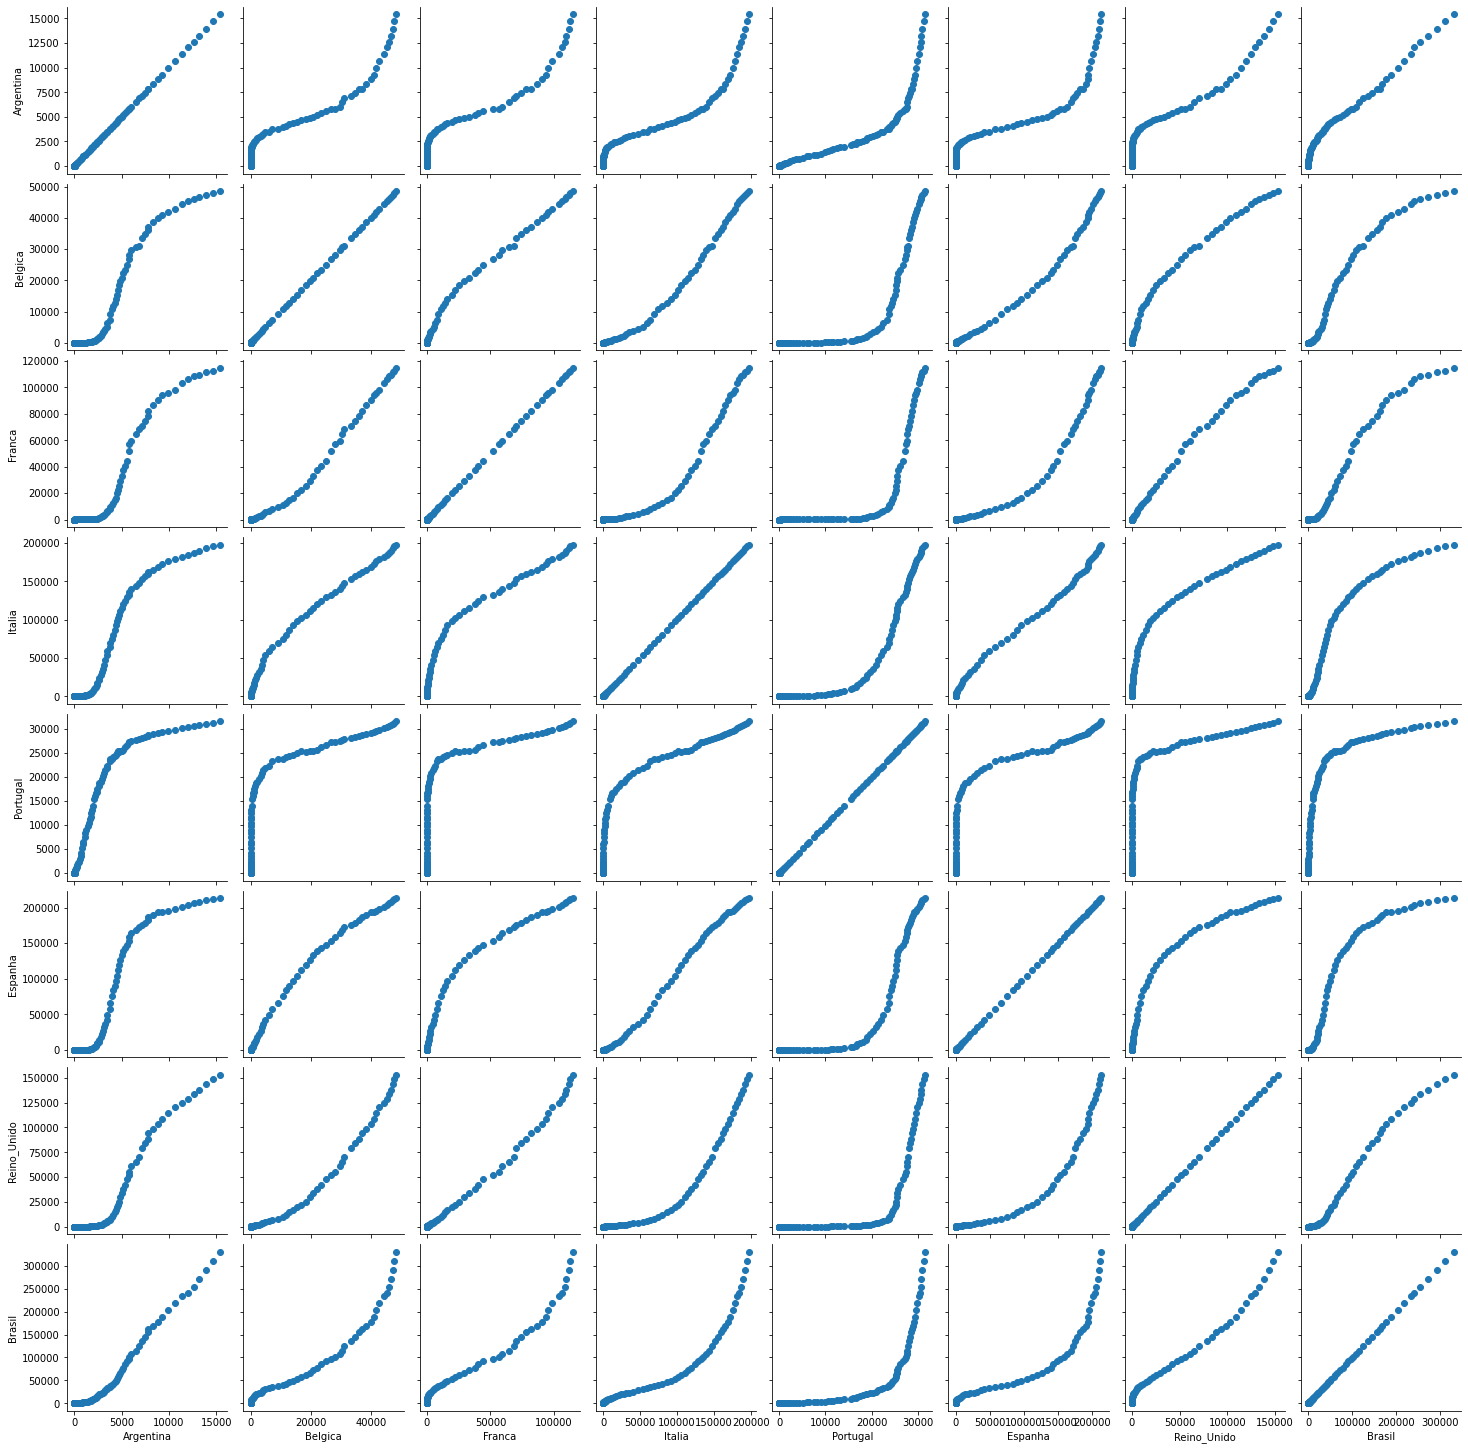

In [23]:
g = sns.PairGrid(paises)
g.map(plt.scatter);

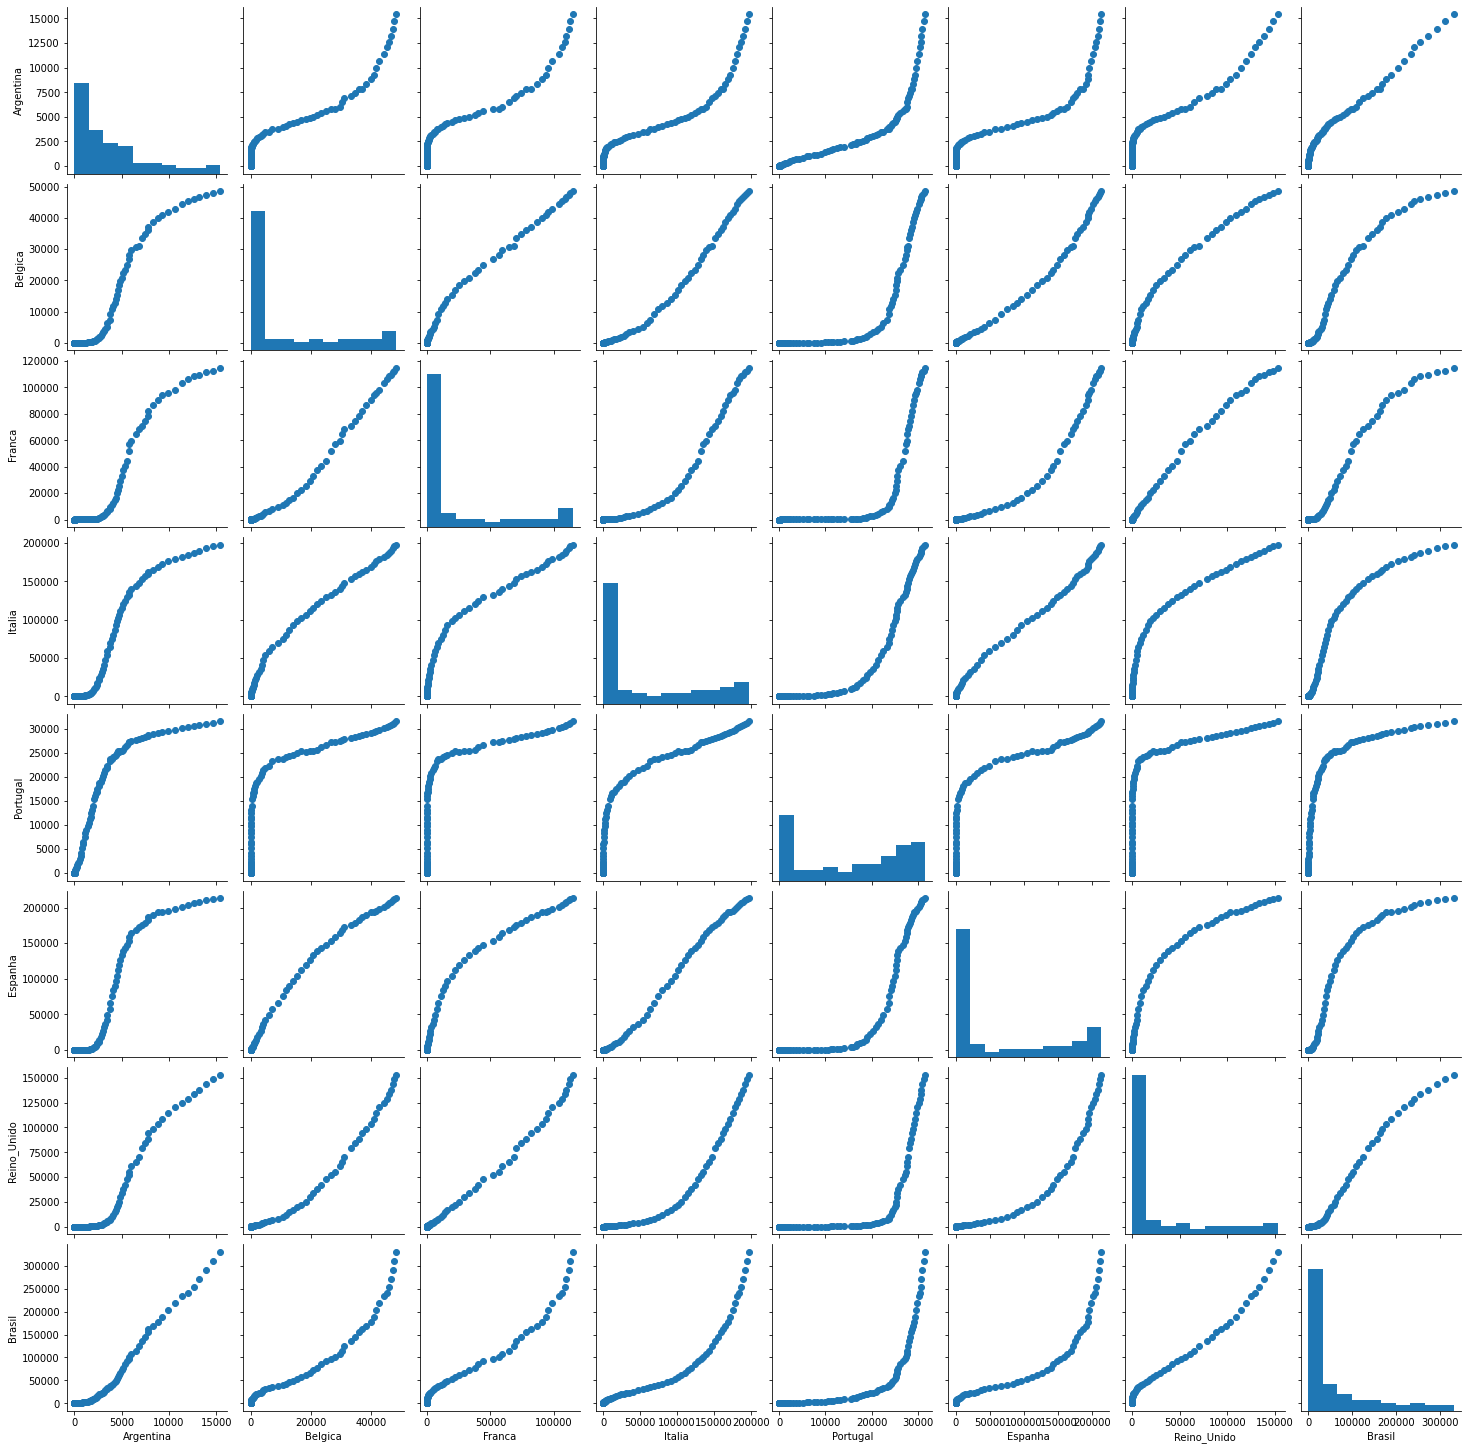

In [30]:
g = sns.PairGrid(paises)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

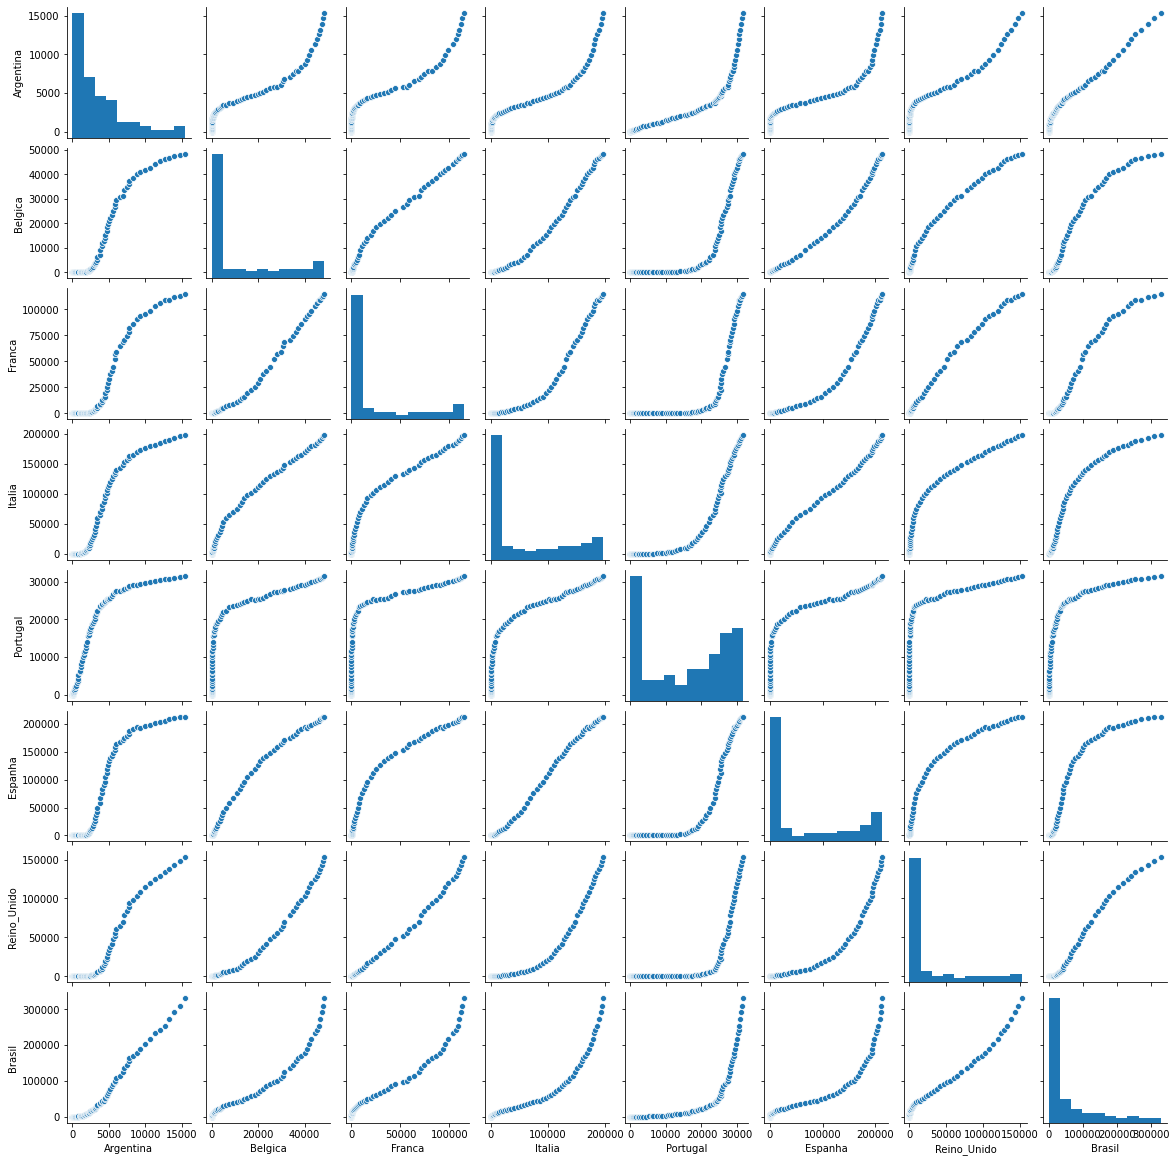

In [25]:
sns.pairplot(paises, height=2);

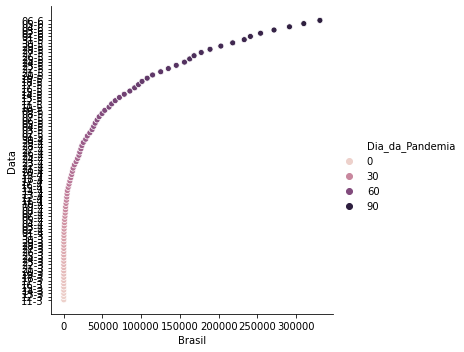

In [26]:
sns.relplot(x='Brasil', y='Data', hue = "Dia_da_Pandemia", data=df2);

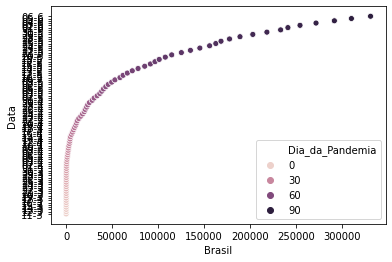

In [27]:
#Aqui trocando o nome do pais tem novos gráficos, pode ser editado a coluna data para melhorar a viz
sns.scatterplot(x='Brasil', y='Data', hue = "Dia_da_Pandemia", data=df2);

## Plotly

In [33]:
import plotly.express as px

fig = px.scatter(df, x="Brasil", y='Data', color='Dia_da_Pandemia', size='Brasil' )
fig.show()

In [32]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Data, y=df.Brasil,name='Brasil'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Argentina, name='Argentina'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Belgica, name='Bélgica'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Franca, name='França'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Italia, name='Itália'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Portugal, name='Portugal'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Espanha, name = 'Espanha'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Reino_Unido, name= 'Reino Unido'))
fig.show()